In [125]:
from keras.layers import Input, Dense, Embedding, Lambda
from keras.models import Model
from keras.backend import mean
from keras.preprocessing.sequence import pad_sequences

In [45]:
from IPython.display import SVG
from keras.utils.vis_utils import plot_model

In [42]:
import keras
import pydot as pyd
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pyd

In [106]:
import numpy as np
from keras import backend as K

In [119]:
category_num = 10
max_purchase_history = 100

In [156]:
data = np.random.randint(low = 1,high=10, size =(10, 100))

In [157]:
data = K.variable(value=data, dtype='int32', name='example_var')

In [158]:
data.shape

TensorShape([Dimension(10), Dimension(100)])

In [120]:
def avg_features(features):
    # This embedding layer will encode the input sequence
    # into a sequence of dense 128-dimensional vectors.
    embeddings = Embedding(output_dim=128, input_dim=category_num, 
                       input_length=max_purchase_history, mask_zero=True)(features)
    avg = Lambda(lambda x: mean(x, axis=1))
    avg_embedding = avg(embeddings)
    return avg_embedding

In [132]:
purchase_seq = Input(shape=(max_purchase_history,), dtype='int32', name='purchase_seq')

In [133]:
broswer_seq = Input(shape=(max_purchase_history,), dtype='int32', name='broswer_seq')

In [134]:
x1 = avg_features(purchase_seq)

In [135]:
x2 = (avg_features(broswer_seq))

In [136]:
x = Dense(64, activation='relu')(keras.layers.concatenate([x1, x2]))

In [137]:
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [138]:
model = Model(inputs=[purchase_seq, broswer_seq], outputs=[main_output])

In [172]:
with tf.Session() as sess:
    #print the random values that we sample
    print (sess.run(model([data, data])))

FailedPreconditionError: Attempting to use uninitialized value embedding_19/embeddings
	 [[Node: embedding_19/embeddings/read = Identity[T=DT_FLOAT, _class=["loc:@embedding_19/embeddings"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_19/embeddings)]]

Caused by op 'embedding_19/embeddings/read', defined at:
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-135-5ec16a85c271>", line 1, in <module>
    x2 = (avg_features(broswer_seq))
  File "<ipython-input-120-43a8695dd852>", line 5, in avg_features
    input_length=max_purchase_history, mask_zero=True)(features)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/layers/embeddings.py", line 109, in build
    dtype=self.dtype)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 229, in __init__
    constraint=constraint)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 376, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 127, in identity
    return gen_array_ops.identity(input, name=name)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2134, in identity
    "Identity", input=input, name=name)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value embedding_19/embeddings
	 [[Node: embedding_19/embeddings/read = Identity[T=DT_FLOAT, _class=["loc:@embedding_19/embeddings"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](embedding_19/embeddings)]]


In [161]:
v = model([data, data])

In [170]:
v.eval()

FailedPreconditionError: Attempting to use uninitialized value main_output_4/bias
	 [[Node: main_output_4/bias/read = Identity[T=DT_FLOAT, _class=["loc:@main_output_4/bias"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](main_output_4/bias)]]

Caused by op 'main_output_4/bias/read', defined at:
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-137-3c489429e687>", line 1, in <module>
    main_output = Dense(1, activation='sigmoid', name='main_output')(x)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/layers/core.py", line 872, in build
    constraint=self.bias_constraint)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 229, in __init__
    constraint=constraint)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 376, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 127, in identity
    return gen_array_ops.identity(input, name=name)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2134, in identity
    "Identity", input=input, name=name)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Users/pengcheng.jia/anaconda3/envs/reco/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value main_output_4/bias
	 [[Node: main_output_4/bias/read = Identity[T=DT_FLOAT, _class=["loc:@main_output_4/bias"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](main_output_4/bias)]]


In [173]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
purchase_seq (InputLayer)       (None, 100)          0                                            
__________________________________________________________________________________________________
broswer_seq (InputLayer)        (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 100, 128)     1280        purchase_seq[0][0]               
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 100, 128)     1280        broswer_seq[0][0]                
__________________________________________________________________________________________________
lambda_13 

In [174]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

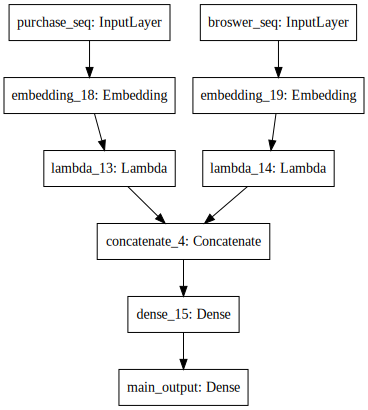

In [175]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))